In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('punkt')
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

#library for regular expretion
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Final1.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

df['rating'].value_counts()

 1    26360
-1    26360
Name: rating, dtype: int64

In [5]:
df['lemmatized_review_without_stopwords_&_punctuations'] = df['lemmatized_review_without_stopwords_&_punctuations'].replace(np.nan, '')


KeyboardInterrupt: ignored

In [6]:
df=df[['lemmatized_review_without_stopwords_&_punctuations','rating']]

In [7]:
x=df['lemmatized_review_without_stopwords_&_punctuations']
y=df['rating']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.5, random_state=42)

In [8]:
vect = CountVectorizer(ngram_range=(1,2))
#converting traning features into numeric vector
X_train = vect.fit_transform(x_train)
#converting training labels into numeric vector
X_test = vect.transform(x_test)


In [10]:
print(vect.vocabulary_)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
from sklearn.model_selection import GridSearchCV
import random
c_space = np.logspace(0.01,2.99,15)
param_grid = {'alpha': c_space}



In [36]:
mnb = MultinomialNB()
mnb_cv = GridSearchCV(mnb, param_grid, cv = 10)


mnb_cv.fit(X_train,y_train)

print("Tuned Logistic Regression Parameters: {}".format(mnb_cv.best_params_)) 
print("Best score is {}".format(mnb_cv.best_score_))



Tuned Logistic Regression Parameters: {'alpha': 1.6705410149459632}
Best score is 0.8718512898330806


In [10]:
mnbfinal=MultinomialNB(alpha= 1.6705410149459632)
mnbfinal.fit(X_train,y_train)
result=mnbfinal.predict(X_test)
print(result)


[ 1  1  1 ... -1  1  1]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, result)
print(cm)
accuracy_score(result,y_test)

[[11775  1405]
 [ 2044 11136]]


0.8691578148710167

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


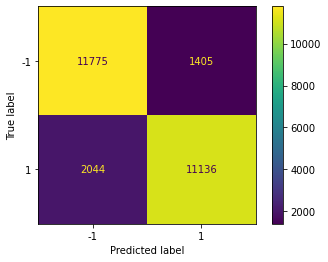

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnbfinal, X_test, y_test)  
plt.show()

In [17]:
report = classification_report(y_test, result)
print('Multinomial Naive Bayes Binary Classification Report:', report, sep='\n\n')

Multinomial Naive Bayes Binary Classification Report:

              precision    recall  f1-score   support

          -1       0.85      0.89      0.87     13180
           1       0.89      0.84      0.87     13180

    accuracy                           0.87     26360
   macro avg       0.87      0.87      0.87     26360
weighted avg       0.87      0.87      0.87     26360



In [14]:
mnb_cv.cv_results_['params']

[{'alpha': 1.023292992280754},
 {'alpha': 1.6705410149459632},
 {'alpha': 2.7271830293654746},
 {'alpha': 4.452166818484028},
 {'alpha': 7.268228485648089},
 {'alpha': 11.865491000980525},
 {'alpha': 19.37059036770167},
 {'alpha': 31.62277660168381},
 {'alpha': 51.6246526831413},
 {'alpha': 84.27801259276707},
 {'alpha': 137.5851078394976},
 {'alpha': 224.60973291663456},
 {'alpha': 366.6787264486123},
 {'alpha': 598.608469384002},
 {'alpha': 977.2372209558112}]

In [37]:
def predict_news(a):
    test = vect.transform(a)
    pred= mnbfinal.predict(test)
    
    if pred == 1:
        return 'Positive'
    elif pred == -1:
        return 'Negative'
    else:
        return 'no class found'

In [38]:
x=['Love this app is simply awesome!']
r = predict_news(x)
print (r)

Negative


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, result)

array([[11775,  1405],
       [ 2044, 11136]])

In [9]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": [1,3,5,9],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

KeyboardInterrupt: ignored

In [18]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion= 'entropy', max_features= 7, min_samples_leaf= 1)
DTC.fit(X_train,y_train)
result1=DTC.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, result1)
print(cm)
print(result1)
accuracy_score(result1,y_test)*100


[[7557 5623]
 [4498 8682]]
[ 1  1  1 ... -1  1  1]


61.604704097116844

In [20]:
report = classification_report(y_test, result1)
print('Decision Tree Binary Classification Report:', report, sep='\n\n')

Decision Tree Binary Classification Report:

              precision    recall  f1-score   support

          -1       0.63      0.57      0.60     13180
           1       0.61      0.66      0.63     13180

    accuracy                           0.62     26360
   macro avg       0.62      0.62      0.62     26360
weighted avg       0.62      0.62      0.62     26360



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


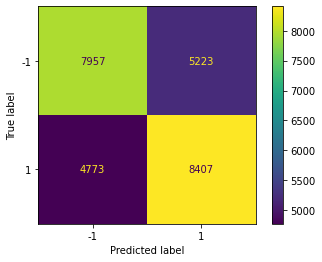

In [16]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTC, X_test, y_test)  
plt.show()

In [30]:
def predict_sent(a):
    test = vect.transform(a)
    pred= DTC.predict(test)
    
    if pred == 1:
        return 'Positive'
    elif pred == -1:
        return 'Negative'
    else:
        return 'no class found'

In [31]:
x=["Dhrumil is a very good boy"]
r = predict_sent(x)
print (r)

Negative


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
logreg=LogisticRegression()
param_grid = [    
    {
    'C' : np.logspace(-4, 4, 20),
    
    
    }
]
clf = search = RandomizedSearchCV(logreg, param_grid, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)



In [30]:
best_clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
best_clf.best_estimator_

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42,max_iter=10000,C=3)
classifier.fit(X_train, y_train)
y=classifier.predict(X_test)
print(y)

[-1  1  1 ... -1  1  1]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y)
print(cm)
print("accuracy score : " , accuracy_score(y_test, y))

[[11687  1493]
 [ 1433 11747]]
accuracy score :  0.8889984825493171


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


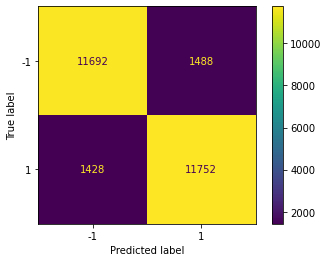

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [36]:
report = classification_report(y_test, y)
print('Logistic regression Binary Classification Report:', report, sep='\n\n')

Logistic regression Binary Classification Report:

              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     13180
           1       0.89      0.89      0.89     13180

    accuracy                           0.89     26360
   macro avg       0.89      0.89      0.89     26360
weighted avg       0.89      0.89      0.89     26360



In [41]:
def predict_sent(a):
    test = vect.transform(a)
    pred= classifier.predict(test)
    
    if pred == 1:
        return 'Positive'
    elif pred == -1:
        return 'Negative'
    else:
        return 'no class found'

In [42]:
x=["Love this app simply awesome!"]
r = predict_sent(x)
print (r)

Positive
